In [30]:
import requests
import pandas as pd

# Liste des compteurs
counters = [
    "urn:ngsi-ld:EcoCounter:X2H25023006",
    "urn:ngsi-ld:EcoCounter:ZLT25011699",
    "urn:ngsi-ld:EcoCounter:COM24010120",
    "urn:ngsi-ld:EcoCounter:COM23120117",
    "urn:ngsi-ld:EcoCounter:X2H24042101",
    "urn:ngsi-ld:EcoCounter:COM23120110",
    "urn:ngsi-ld:EcoCounter:COM23120111",
    "urn:ngsi-ld:EcoCounter:COM23120114",
    "urn:ngsi-ld:EcoCounter:COM23120113",
    "urn:ngsi-ld:EcoCounter:COM23120112",
    "urn:ngsi-ld:EcoCounter:COM24010121",
    "urn:ngsi-ld:EcoCounter:COM24010119",
    "urn:ngsi-ld:EcoCounter:XTH24072390"
]

# Dates pour l'API (format ISO)
from_date = "2025-03-10T00:00:00"
to_date   = "2025-11-28T23:59:59"

all_data = []

for counter_id in counters:
    print(f" Récupération pour : {counter_id}")
    
    # 1️ Historique des séries temporelles
    url_series = f"https://portail-api-data.montpellier3m.fr/ecocounter_timeseries/{counter_id}/attrs/intensity"
    params = {"fromDate": from_date, "toDate": to_date}
    response = requests.get(url_series, params=params)
    
    if response.status_code == 200:
        data_series = response.json()
        df_series = pd.DataFrame({
            "datetime": data_series["index"],
            "intensity": data_series["values"]
        })
        df_series["counter_id"] = counter_id
    else:
        print(f"Erreur séries temporelles pour {counter_id} : {response.status_code}")
        continue

    # 2️ Description du compteur
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"][0], data_desc["location"]["value"]["coordinates"][1]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
        
        # Ajouter les colonnes statiques
        df_series["lat"] = lat
        df_series["lon"] = lon
        df_series["laneId"] = laneId
        df_series["vehicleType"] = vehicleType
    else:
        print(f"Erreur description pour {counter_id} : {response_desc.status_code}")
        df_series["lat"] = None
        df_series["lon"] = None
        df_series["laneId"] = None
        df_series["vehicleType"] = None

    all_data.append(df_series)
    print(f"{len(df_series)} lignes récupérées")

# 3️ Fusion finale
if all_data:
    df_all = pd.concat(all_data, ignore_index=True)
    df_all["datetime"] = pd.to_datetime(df_all["datetime"])
    
    # 4️ Sauvegarde CSV
    df_all.to_csv("../data/raw/ecocounters_full_complet.csv", index=False)
    print("\n CSV complet enregistré : ../data/raw/ecocounters_full_complet.csv")
else:
    print("Aucune donnée récupérée")


 Récupération pour : urn:ngsi-ld:EcoCounter:X2H25023006
6286 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:ZLT25011699
2028 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010120
4157 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120117
3970 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:X2H24042101
6287 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120110
3984 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120111
4008 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120114
4056 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120113
4128 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120112
4224 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010121
186 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010119
217 lignes récupérées
 Récupération pour : urn:ngsi-ld:EcoCounter:XTH2407239

In [31]:
df_all.groupby("counter_id")["datetime"].agg(["min", "max"])

,min,max
counter_id,,
urn:ngsi-ld:EcoCounter:COM23120110,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120111,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120112,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120113,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120114,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120117,2025-06-17 01:00:00+00:00,2025-11-28 00:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010119,2025-11-01 05:30:00+00:00,2025-11-27 23:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010120,2025-06-17 01:00:00+00:00,2025-11-26 23:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010121,2025-10-31 05:30:00+00:00,2025-11-27 12:00:00+00:00


## 1️ Statistiques descriptives : (les statistiques globales et par compteur)
Moyenne, min, max, écart-type, etc. pour chaque compteur

In [32]:
# Statistiques globales
print("Statistiques globales sur l'intensité :")
print(df_all["intensity"].describe())

# Statistiques par compteur
stats_par_counter = df_all.groupby("counter_id")["intensity"].describe()
display(stats_par_counter)


Statistiques globales sur l'intensité :
count    49820.000000
mean        16.953954
std         28.047444
min          0.000000
25%          1.000000
50%          7.000000
75%         21.000000
max        346.000000
Name: intensity, dtype: float64


,count,mean,std,min,25%,50%,75%,max
counter_id,,,,,,,,
urn:ngsi-ld:EcoCounter:COM23120110,3984.0,2.820532,3.093516,0.0,0.0,2.0,4.00,20.0
urn:ngsi-ld:EcoCounter:COM23120111,4008.0,15.748004,18.653296,0.0,2.0,10.0,21.00,126.0
urn:ngsi-ld:EcoCounter:COM23120112,4224.0,11.068892,11.454457,0.0,2.0,8.0,17.00,75.0
urn:ngsi-ld:EcoCounter:COM23120113,4128.0,43.996851,41.251875,0.0,11.0,36.0,61.00,237.0
urn:ngsi-ld:EcoCounter:COM23120114,4056.0,50.177022,57.651115,0.0,8.0,34.0,66.00,346.0
urn:ngsi-ld:EcoCounter:COM23120117,3970.0,8.758942,9.733981,0.0,1.0,6.0,13.00,67.0
urn:ngsi-ld:EcoCounter:COM24010119,217.0,7.732719,7.660776,0.0,1.0,6.0,13.00,35.0
urn:ngsi-ld:EcoCounter:COM24010120,4157.0,14.404138,16.092079,0.0,1.0,9.0,24.00,111.0
urn:ngsi-ld:EcoCounter:COM24010121,186.0,61.844086,63.419942,0.0,7.0,50.0,82.75,269.0


## 2️ Calcul de la durée de collecte pour chaque compteur : 
**calculer le nombre de jours pour chaque compteur et créer des groupes selon tes critères :**

In [33]:
# Convertir datetime si ce n'est pas déjà fait
df_all["datetime"] = pd.to_datetime(df_all["datetime"])

# Calcul de la durée en jours pour chaque compteur
duration = df_all.groupby("counter_id")["datetime"].agg(["min", "max"])
duration["days"] = (duration["max"] - duration["min"]).dt.days + 1

# Ajouter une colonne catégorie
def categorize_counter(days):
    if days >= 200:
        return "plus de 200 jours"
    elif days >= 162:
        return "162 jours ou plus"
    elif days < 100:
        return "moins de 100 jours"
    else:
        return "autres"

duration["category"] = duration["days"].apply(categorize_counter)
display(duration)

,min,max,days,category
counter_id,,,,
urn:ngsi-ld:EcoCounter:COM23120110,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120111,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120112,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120113,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120114,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120117,2025-06-17 01:00:00+00:00,2025-11-28 00:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM24010119,2025-11-01 05:30:00+00:00,2025-11-27 23:00:00+00:00,27,moins de 100 jours
urn:ngsi-ld:EcoCounter:COM24010120,2025-06-17 01:00:00+00:00,2025-11-26 23:00:00+00:00,163,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM24010121,2025-10-31 05:30:00+00:00,2025-11-27 12:00:00+00:00,28,moins de 100 jours


## 4️ Visualisation
#### a) Séries temporelles pour chaque compteur

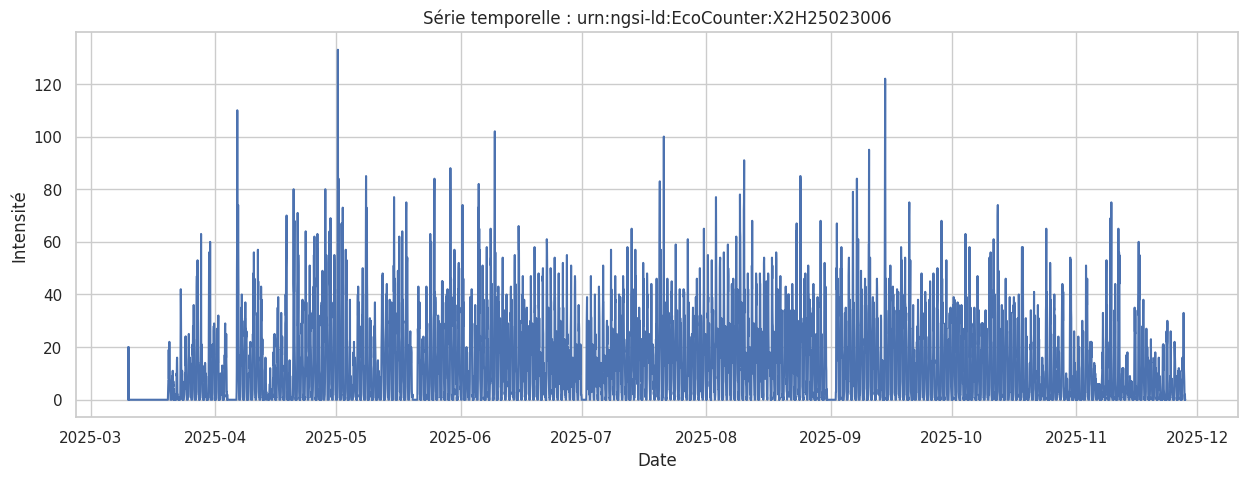

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Exemple pour un compteur
compteur = "urn:ngsi-ld:EcoCounter:X2H25023006"
df_plot = df_all[df_all["counter_id"] == compteur]

plt.figure(figsize=(15,5))
plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)
plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title(f"Série temporelle : {compteur}")
plt.show()

#### b) Comparer jours de semaine vs week-end

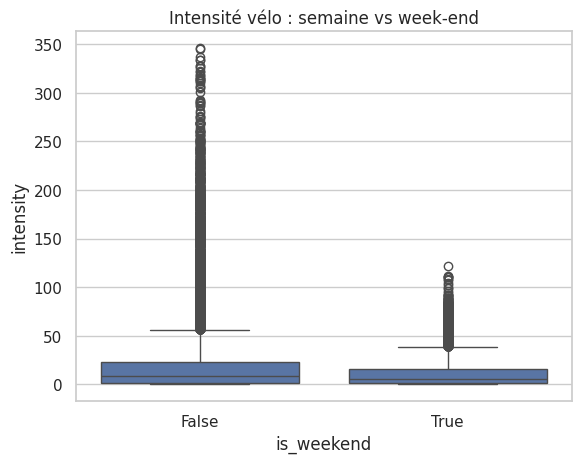

In [35]:
df_all["weekday"] = df_all["datetime"].dt.weekday  # 0 = lundi ... 6 = dimanche
df_all["is_weekend"] = df_all["weekday"].isin([5,6])

sns.boxplot(x="is_weekend", y="intensity", data=df_all)
plt.title("Intensité vélo : semaine vs week-end")
plt.show()

#### c) Heures de pointe

In [40]:
# Créer la colonne 'hour' à partir de 'datetime'
df_all['hour'] = pd.to_datetime(df_all['datetime']).dt.hour

# Vérifier
print(df_all[['datetime','hour']].head())

                   datetime  hour
0 2025-03-10 10:00:00+00:00    10
1 2025-03-10 10:00:00+00:00    10
2 2025-03-10 10:00:00+00:00    10
3 2025-03-10 10:00:00+00:00    10
4 2025-03-10 10:00:00+00:00    10


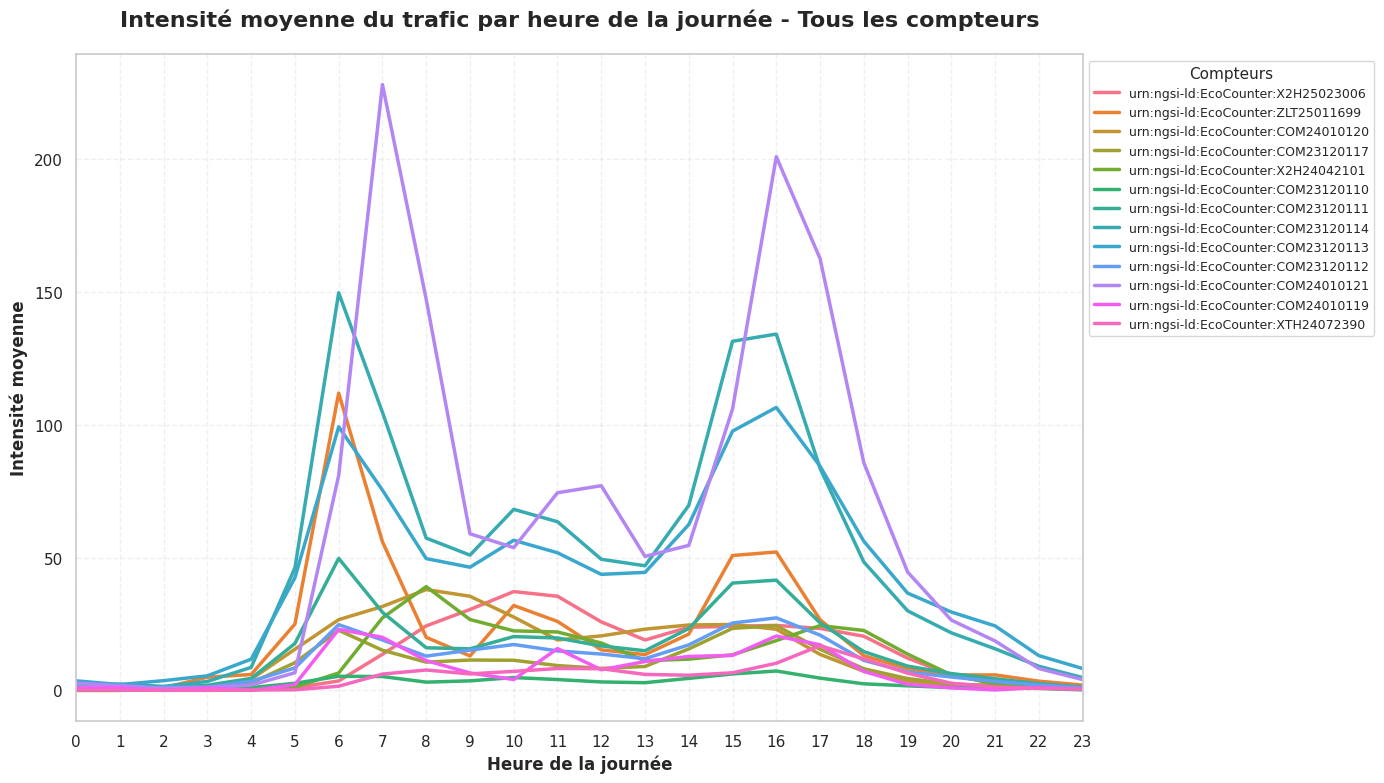

In [41]:
# Configuration p
plt.figure(figsize=(14, 8))

# Création du graphique avec tous les compteurs
sns.lineplot(x="hour", y="intensity", hue="counter_id", data=df_all, 
        estimator="mean", errorbar=None, linewidth=2.5)

# titres et labels
plt.title("Intensité moyenne du trafic par heure de la journée - Tous les compteurs", 
        fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Heure de la journée", fontsize=12, fontweight='bold')
plt.ylabel("Intensité moyenne", fontsize=12, fontweight='bold')

# axes
plt.xticks(range(0, 24, 1))  # Toutes les heures
plt.xlim(0, 23)
plt.grid(True, alpha=0.3, linestyle='--')

# la légende pour tous les compteurs
plt.legend(title="Compteurs", title_fontsize=11, fontsize=9, 
        loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement du layout
plt.tight_layout()

plt.show()

### CLASSEMENT DES COMPTEURS SELON LE TRAFIC ET PROFIL HORAIRE :

**um.ngsi-ld:EcGCounter-X2H25023006 : Fort trafic, pic soir >200**

um.ngsi-ld:EcGCounter-ZLT25021089 : Moyen, profil standard

**um.ngsi-ld:EcGCounter-COM24010120 : Élevé, double pic marqué**

um.ngsi-ld:EcGCounter-COM23120117 : Faible, stable

**um.ngsi-ld:EcGCounter-X2H24042101 : Très fort, leader >250**

um.ngsi-ld:EcGCounter-COM23120110 : Faible, régulier

um.ngsi-ld:EcGCounter-COM23120111 : Faible, constant

um.ngsi-ld:EcGCounter-COM23120114 : Moyen-faible

um.ngsi-ld:EcGCounter-COM23120113 : Faible, stable

um.ngsi-ld:EcGCounter-COM23120112 : Faible, régulier

um.ngsi-ld:EcGCounter-COM24010121 : Moyen, pic soir

um.ngsi-ld:EcGCounter-COM24010119 : Moyen, double pic

**um.ngsi-ld:EcGCounter-XTH24072390 : Fort, pic soir prononcé** 

**TOP 3 trafic : X2H24042101 > X2H25023006 > XTH24072390**

**Faible trafic : Tous COM2312011x**

**Pic soir dominant sur tous les compteurs**

### Observations principales de l’exploration

Profil horaire général : double pic marqué (matin 8-9h / soir 17-18h), plateau stable 10h-16h, creux nuit 0-6h.

Variabilité par compteur : certains compteurs ont des pics très élevés (>250), d’autres sont stables ou faiblement fréquentés.

Typologie de zone : les mouvements reflètent des zones résidentielles + professionnelles, avec des pendulaires matin/soir.

Classement des compteurs :

Fort trafic : X2H24042101, X2H25023006, XTH24072390

Moyen : COM24010120, COM24010121, COM24010119

Faible : COM23120110 → COM23120117 (plusieurs)

In [27]:
# Nombre de NaN par colonne
print(df_all.isna().sum())

# Pourcentage de NaN
print(df_all.isna().mean() * 100)

datetime       0
intensity      0
counter_id     0
lat            0
lon            0
laneId         0
vehicleType    0
weekday        0
is_weekend     0
hour           0
dtype: int64
datetime       0.0
intensity      0.0
counter_id     0.0
lat            0.0
lon            0.0
laneId         0.0
vehicleType    0.0
weekday        0.0
is_weekend     0.0
hour           0.0
dtype: float64


In [42]:
# Nombre total de doublons exacts sur toutes les colonnes
print("Nombre de doublons exacts :", df_all.duplicated().sum())

Nombre de doublons exacts : 2140


In [43]:
# Afficher toutes les lignes qui sont des doublons
doublons = df_all[df_all.duplicated(keep=False)]  # keep=False montre toutes les occurrences
display(doublons)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
0,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
1,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
3,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
4,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
5,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
...,...,...,...,...,...,...,...,...,...,...
49791,2025-11-26 00:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,0
49792,2025-11-26 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,1
49793,2025-11-26 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,1
49794,2025-11-26 02:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,2


In [ ]:
# Vérifier les doublons sur colonnes spécifiques
doublons_subset = df_all[df_all.duplicated(subset=['datetime', 'counter_id'], keep=False)]
display(doublons_subset)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
0,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
1,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
2,2025-03-10 10:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
3,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
4,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,False,10
...,...,...,...,...,...,...,...,...,...,...
49791,2025-11-26 00:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,0
49792,2025-11-26 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,1
49793,2025-11-26 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,1
49794,2025-11-26 02:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:XTH24072390,43.660053,3.900942,930381158,bicycle,2,False,2


In [45]:
# doublons sont exactement identiques alors supprimer
df_all = df_all.drop_duplicates()

count    47680.000000
mean        17.016904
std         28.187939
min          0.000000
25%          1.000000
50%          7.000000
75%         21.000000
max        346.000000
Name: intensity, dtype: float64


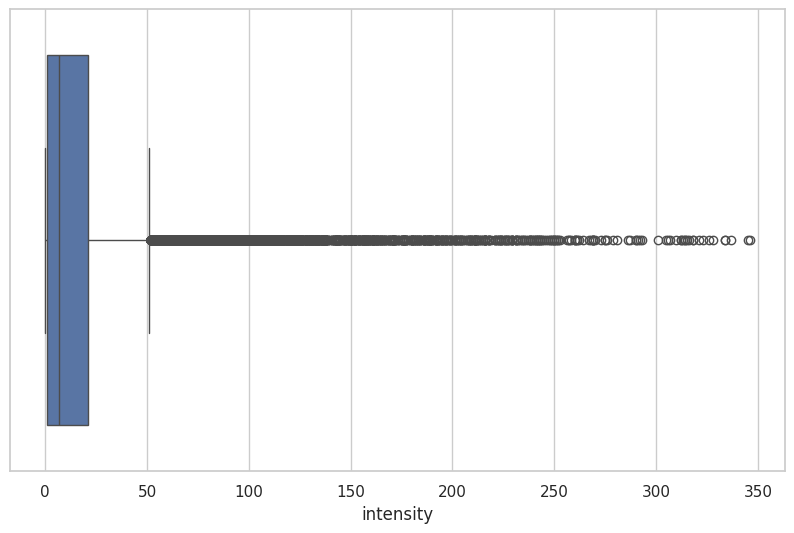

In [29]:
# Résumé statistique
print(df_all['intensity'].describe())

# Boxplot pour visualiser les outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='intensity', data=df_all)
plt.show()

In [47]:
# Intensité négative ou trop élevée (>300) .
intensity_neg = df_all[df_all['intensity'] < 0]
print("Valeurs négatives :")

Valeurs négatives :


In [48]:
intensity_high = df_all[df_all['intensity'] > 300]
print("Valeurs très élevées (>300) :")
display(intensity_high)

Valeurs très élevées (>300) :


,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
30736,2025-06-17 06:00:00+00:00,334.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,1,False,6
30784,2025-06-19 06:00:00+00:00,313.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,3,False,6
30880,2025-06-23 06:00:00+00:00,312.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,0,False,6
30904,2025-06-24 06:00:00+00:00,321.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,1,False,6
32680,2025-09-02 06:00:00+00:00,326.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,1,False,6
32824,2025-09-08 06:00:00+00:00,318.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,0,False,6
32848,2025-09-09 06:00:00+00:00,310.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,1,False,6
33008,2025-09-15 06:00:00+00:00,328.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,0,False,6
33040,2025-09-16 06:00:00+00:00,345.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,1,False,6
33088,2025-09-18 06:00:00+00:00,306.0,urn:ngsi-ld:EcoCounter:COM23120114,43.609673,3.898657,121403595,bicycle,3,False,6


In [52]:
# Valeurs supérieures à 300
extreme_values = df_all[df_all['intensity'] > 300]
print(extreme_values.groupby('counter_id')['intensity'].count())

counter_id
urn:ngsi-ld:EcoCounter:COM23120114    23
Name: intensity, dtype: int64


In [ ]:
# remplacer par la médiane par compteur: 
# df_all['intensity'] = df_all.groupby('counter_id')['intensity'].transform(
#     lambda x: x.clip(lower=0, upper=300)
# )

# Dataset principal (>=162 jours)

In [ ]:
#  1️ Filtrer les compteurs fiables (durée >= 162 jours)
reliable_counters = duration[duration["days"] >= 162].index.tolist()
df_162 = df_all[df_all["counter_id"].isin(reliable_counters)].copy()

#  2️ Ajouter les colonnes temporelles
df_162["hour"] = df_162["datetime"].dt.hour # c'est 
df_162["weekday"] = df_162["datetime"].dt.weekday  # 0 = lundi
df_162["is_weekend"] = df_162["weekday"].isin([5,6]).astype(int)

#  3️ Créer df_description ( car on n'est pas fait au debut )
all_desc = []

for counter_id in reliable_counters:
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
        
        all_desc.append({
            "counter_id": counter_id,
            "lat": lat,
            "lon": lon,
            "laneId": laneId,
            "vehicleType": vehicleType
        })
    else:
        all_desc.append({
            "counter_id": counter_id,
            "lat": None,
            "lon": None,
            "laneId": None,
            "vehicleType": None
        })

df_description = pd.DataFrame(all_desc)

#  4️ Merge pour ajouter les colonnes statiques au df_162
df_162 = df_162.merge(df_description, on="counter_id", how="left")

#  5️ des features pour prédiction
# Moyenne glissante sur 3 heures
df_162["rolling_3h"] = df_162.groupby("counter_id")["intensity"].transform(lambda x: x.rolling(3, min_periods=1).mean())
# Décalages temporels
df_162["lag_1h"] = df_162.groupby("counter_id")["intensity"].shift(1)
df_162["lag_24h"] = df_162.groupby("counter_id")["intensity"].shift(24)

#  Vérification rapide
display(df_162.head())
print("Nombre de lignes :", len(df_162))
print("Liste des compteurs dans df_162 :", df_162["counter_id"].unique())


,datetime,intensity,counter_id,lat_x,lon_x,laneId_x,vehicleType_x,weekday,is_weekend,hour,lat_y,lon_y,laneId_y,vehicleType_y,rolling_3h,lag_1h,lag_24h
0,2025-03-10 10:00:00+00:00,20.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,0,10,43.539352,3.887153,31450087,bicycle,20.000000,NaN,NaN
1,2025-03-10 10:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,0,10,43.539352,3.887153,31450087,bicycle,10.000000,20.0,NaN
2,2025-03-10 11:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,0,11,43.539352,3.887153,31450087,bicycle,6.666667,0.0,NaN
3,2025-03-10 12:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,0,12,43.539352,3.887153,31450087,bicycle,0.000000,0.0,NaN
4,2025-03-10 13:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H25023006,43.539352,3.887153,31450087,bicycle,0,0,13,43.539352,3.887153,31450087,bicycle,0.000000,0.0,NaN


Nombre de lignes : 47468
Liste des compteurs dans df_162 : ['urn:ngsi-ld:EcoCounter:X2H25023006' 'urn:ngsi-ld:EcoCounter:ZLT25011699'
 'urn:ngsi-ld:EcoCounter:COM24010120' 'urn:ngsi-ld:EcoCounter:COM23120117'
 'urn:ngsi-ld:EcoCounter:X2H24042101' 'urn:ngsi-ld:EcoCounter:COM23120110'
 'urn:ngsi-ld:EcoCounter:COM23120111' 'urn:ngsi-ld:EcoCounter:COM23120114'
 'urn:ngsi-ld:EcoCounter:COM23120113' 'urn:ngsi-ld:EcoCounter:COM23120112'
 'urn:ngsi-ld:EcoCounter:XTH24072390']


In [55]:
df_162 = df_162.rename(columns={
    "lat_y": "lat",
    "lon_y": "lon",
    "laneId_y": "laneId",
    "vehicleType_y": "vehicleType"
})

In [ ]:
df_162 = df_162.drop(columns=[
    "lat_x", 
    "lon_x", 
    "laneId_x", 
    "vehicleType_x"
])

In [57]:
print(df_162.columns)

Index(['datetime', 'intensity', 'counter_id', 'weekday', 'is_weekend', 'hour',
       'lat', 'lon', 'laneId', 'vehicleType', 'rolling_3h', 'lag_1h',
       'lag_24h'],
      dtype='object')


In [59]:
df_162.to_csv("../data/processed/df_162_clean.csv", index=False)

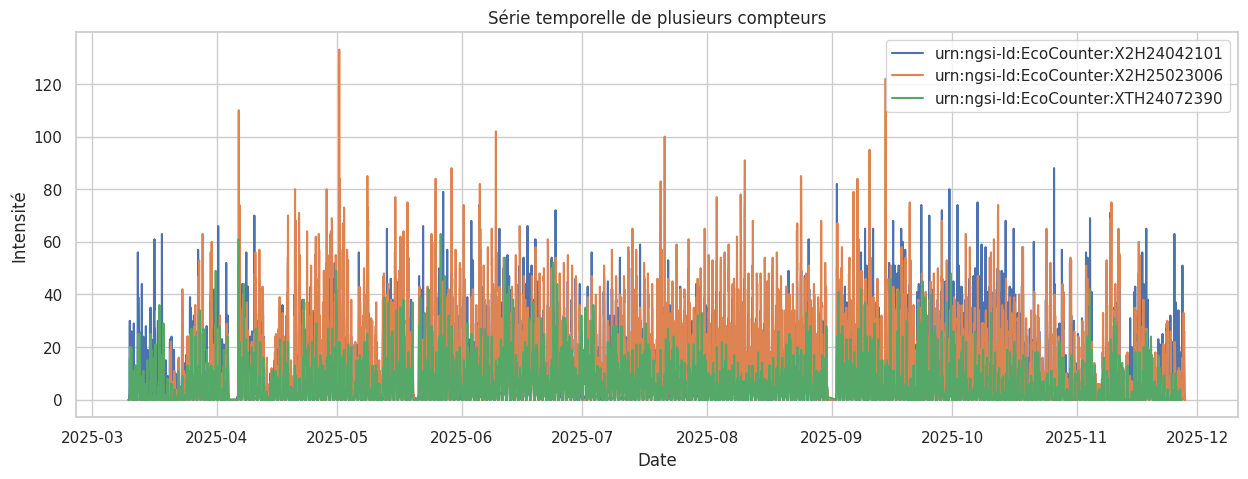

In [62]:
import matplotlib.pyplot as plt

compteurs = [
    "urn:ngsi-ld:EcoCounter:X2H24042101",
    "urn:ngsi-ld:EcoCounter:X2H25023006",
    "urn:ngsi-ld:EcoCounter:XTH24072390"
]

plt.figure(figsize=(15,5))

for compteur in compteurs:
    df_plot = df_162[df_162["counter_id"] == compteur]
    plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)

plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title("Série temporelle de plusieurs compteurs")
plt.legend()
plt.show()


In [63]:
# 1️ Récupérer les listes de compteurs par catégorie
counters_200 = duration[duration["category"] == "plus de 200 jours"].index.tolist()
counters_162 = duration[duration["category"] == "162 jours ou plus"].index.tolist()
counters_100 = duration[duration["category"] == "moins de 100 jours"].index.tolist()

In [64]:
print(">= 200 jours :", len(counters_200))
print(">= 162 jours :", len(counters_162))
print("< 100 jours :", len(counters_100))

>= 200 jours : 3
>= 162 jours : 8
< 100 jours : 2


In [65]:
df_200 = df_all[df_all["counter_id"].isin(counters_200)].copy()
df_100 = df_all[df_all["counter_id"].isin(counters_100)].copy()

In [66]:
print("df_all :", df_all.shape)
print("df_200 :", df_200.shape)
print("df_162 :", df_162.shape)
print("df_100 :", df_100.shape)

print("\nCompteurs dans df_200 :")
print(df_200["counter_id"].nunique())

print("\nCompteurs dans df_162 :")
print(df_162["counter_id"].nunique())

print("\nCompteurs dans df_100 :")
print(df_100["counter_id"].nunique())

df_all : (47680, 10)
df_200 : (18071, 10)
df_162 : (47468, 13)
df_100 : (212, 10)

Compteurs dans df_200 :
3

Compteurs dans df_162 :
11

Compteurs dans df_100 :
2


## 1) Corrélation interne (api velo seule)

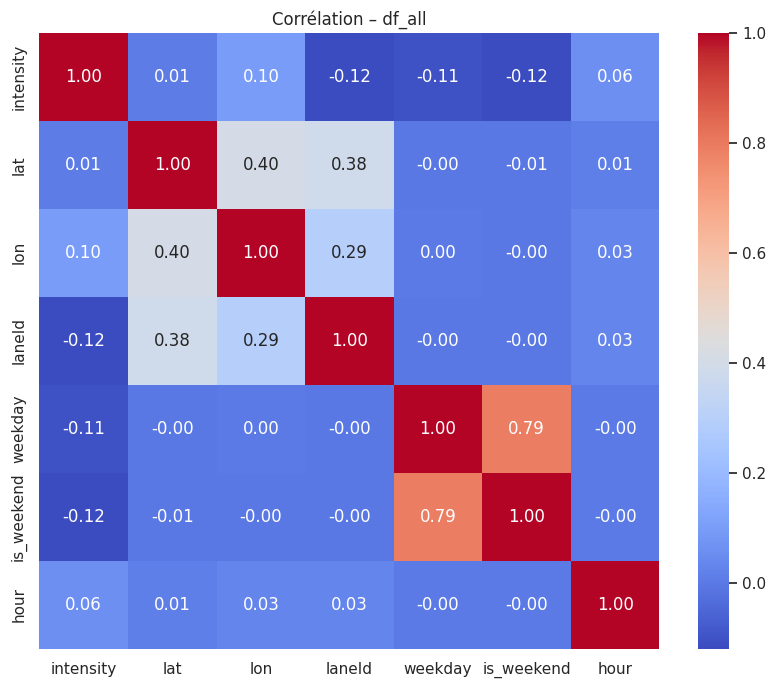

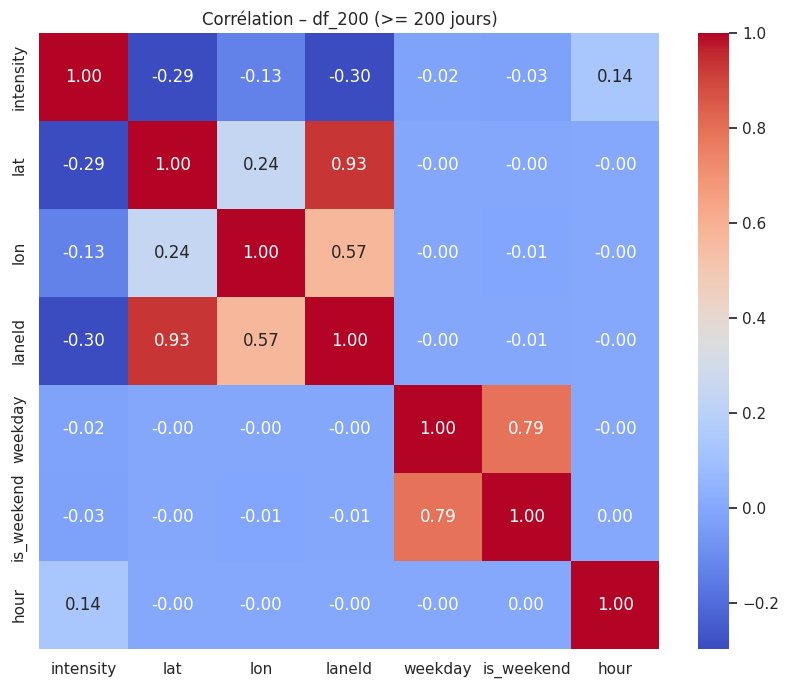

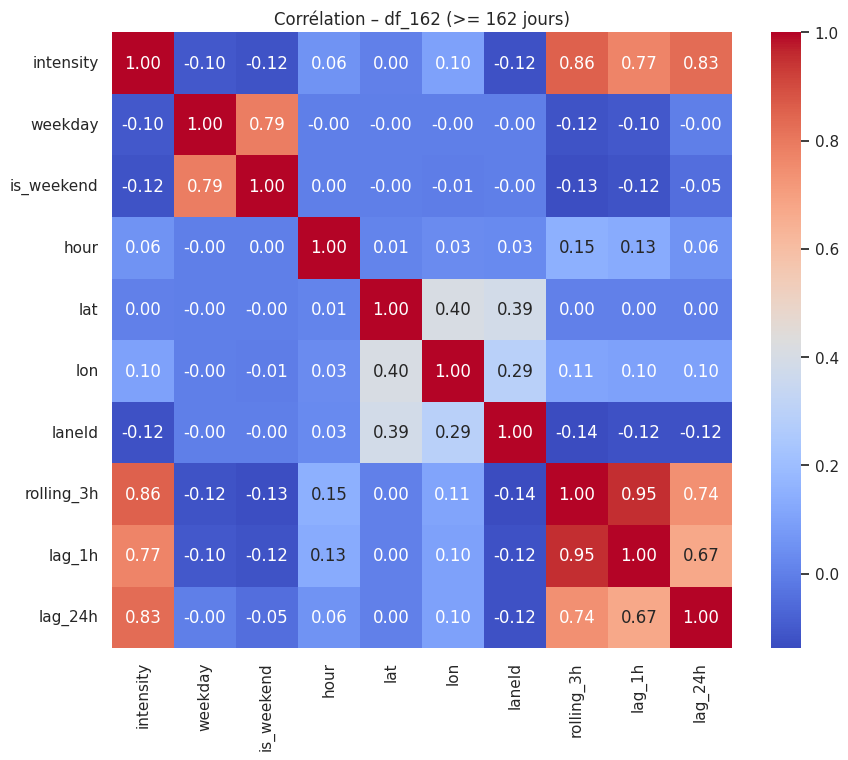

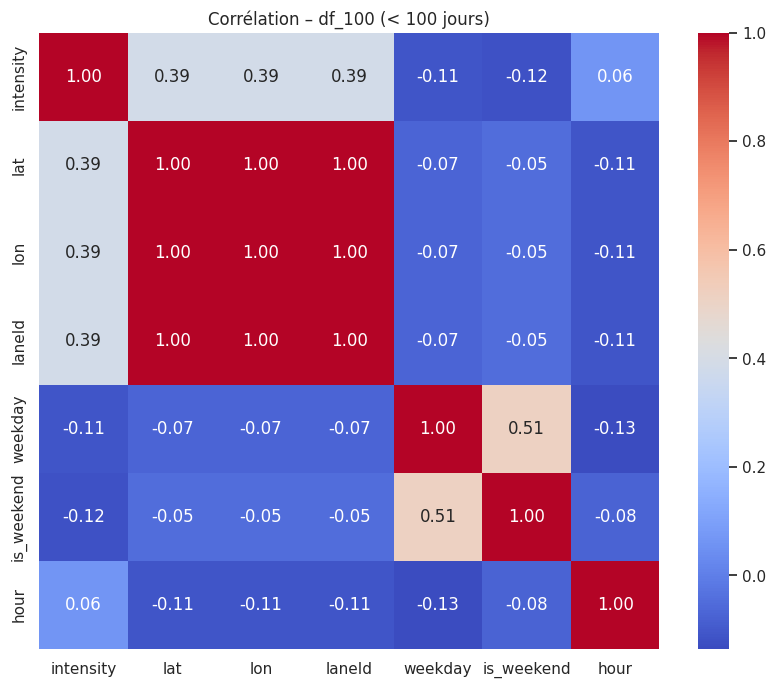

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Corrélations
plot_correlation(df_all, "Corrélation – df_all")
plot_correlation(df_200, "Corrélation – df_200 (>= 200 jours)")
plot_correlation(df_162, "Corrélation – df_162 (>= 162 jours)")
plot_correlation(df_100, "Corrélation – df_100 (< 100 jours)")


## 2) Corrélation avec la météo (ma_meteo_export.csv)

 Objectif :
Voir si l’intensité vélo dépend :

de la température

de la pluie

du vent

de l'humidité

In [71]:
#2.1 Charger la météo: 
df_meteo = pd.read_csv(
    "../data/raw/ma_meteo_export.csv",
    sep=";",                # séparateur ; 
    decimal=",",  # virgule : float
    )   
## Convertir datetime        
df_meteo["datetime"] = pd.to_datetime(df_meteo["datetime"])
# Vérification
print(df_meteo.dtypes)
display(df_meteo.head())

datetime          datetime64[ns]
temperature_2m           float64
wind_speed_10m           float64
precipitation            float64
dtype: object


,datetime,temperature_2m,wind_speed_10m,precipitation
0,2025-03-10 00:00:00,10.1,8.8,0.1
1,2025-03-10 01:00:00,9.9,6.9,0.0
2,2025-03-10 02:00:00,10.2,9.6,0.0
3,2025-03-10 03:00:00,10.3,10.0,0.0
4,2025-03-10 04:00:00,10.0,10.3,0.0


In [74]:
# 2.2 Fusionner la météo avec les datasets vélo:   merge par datetime :
def merge_meteo(df_velo, df_meteo):
    df = df_velo.merge(df_meteo, on="datetime", how="left")
    return df

df_all["datetime"] = df_all["datetime"].dt.tz_convert(None)
df_200["datetime"] = df_200["datetime"].dt.tz_convert(None)
df_162["datetime"] = df_162["datetime"].dt.tz_convert(None)
df_100["datetime"] = df_100["datetime"].dt.tz_convert(None)

In [75]:
# verification: 
print(df_all["datetime"].dtype)
print(df_meteo["datetime"].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# uniformiser dans l’autre sens (mettre UTC aussi dans météo)
df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize("UTC")

In [78]:
print("df_all :", df_all["datetime"].dtype)
print("df_meteo :", df_meteo["datetime"].dtype)

print(df_all["datetime"].head())
print(df_meteo["datetime"].head())

df_all : datetime64[ns]
df_meteo : datetime64[ns, UTC]
0    2025-03-10 10:00:00
2    2025-03-10 10:00:00
10   2025-03-10 11:00:00
20   2025-03-10 12:00:00
30   2025-03-10 13:00:00
Name: datetime, dtype: datetime64[ns]
0   2025-03-10 00:00:00+00:00
1   2025-03-10 01:00:00+00:00
2   2025-03-10 02:00:00+00:00
3   2025-03-10 03:00:00+00:00
4   2025-03-10 04:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]


In [79]:
df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize(None)

In [80]:
df_all_meteo = df_all.merge(df_meteo, on="datetime", how="left")
df_200_meteo = df_200.merge(df_meteo, on="datetime", how="left")
df_162_meteo = df_162.merge(df_meteo, on="datetime", how="left")
df_100_meteo = df_100.merge(df_meteo, on="datetime", how="left")

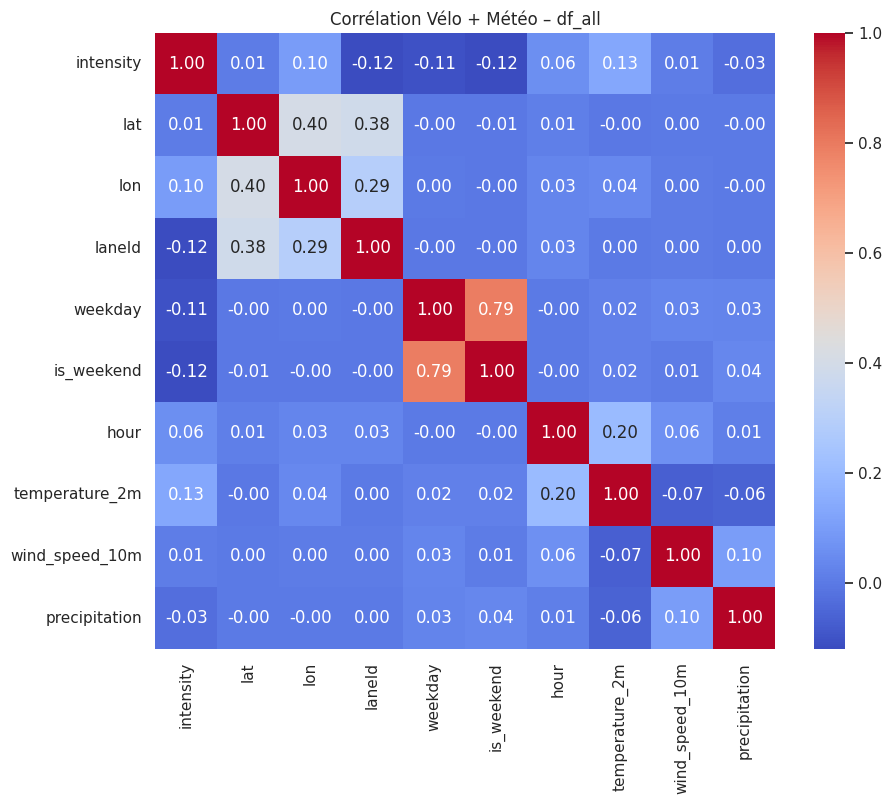

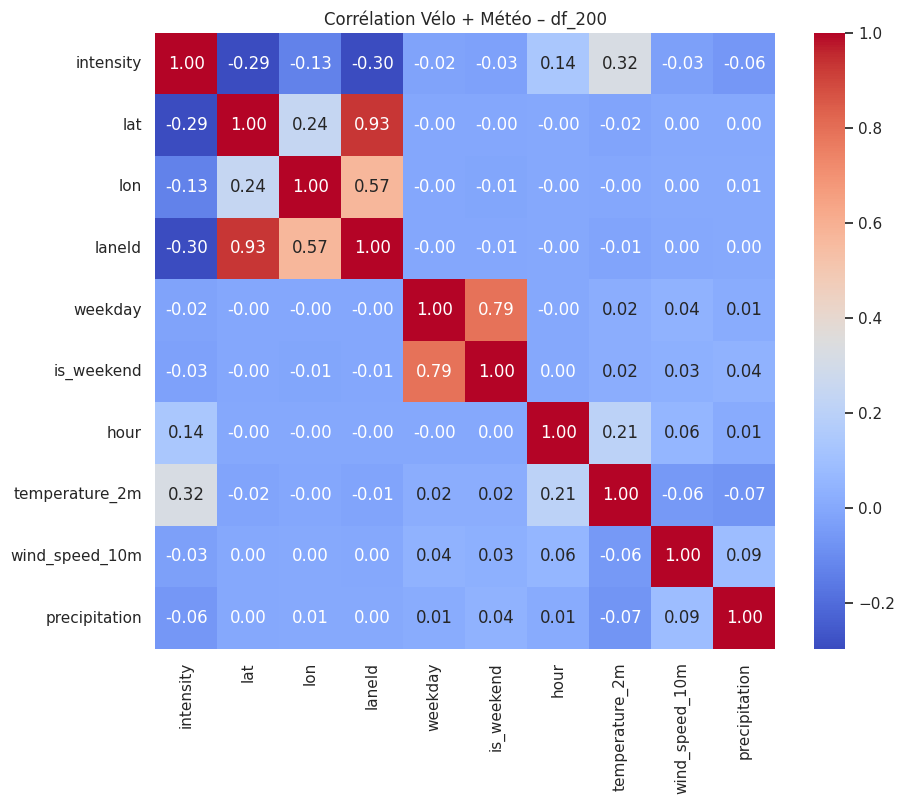

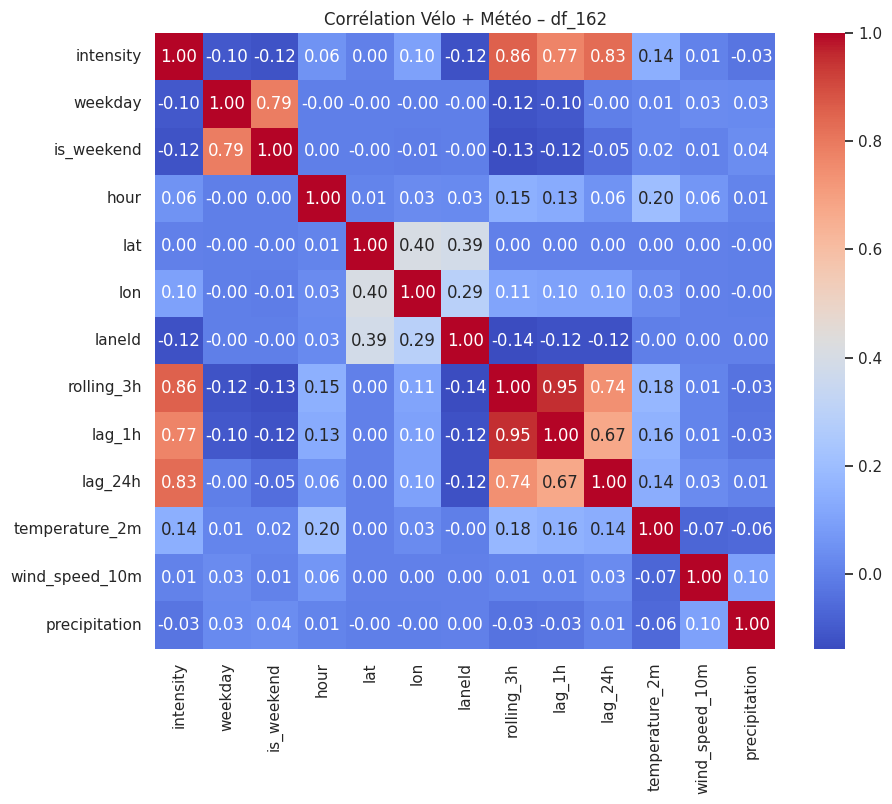

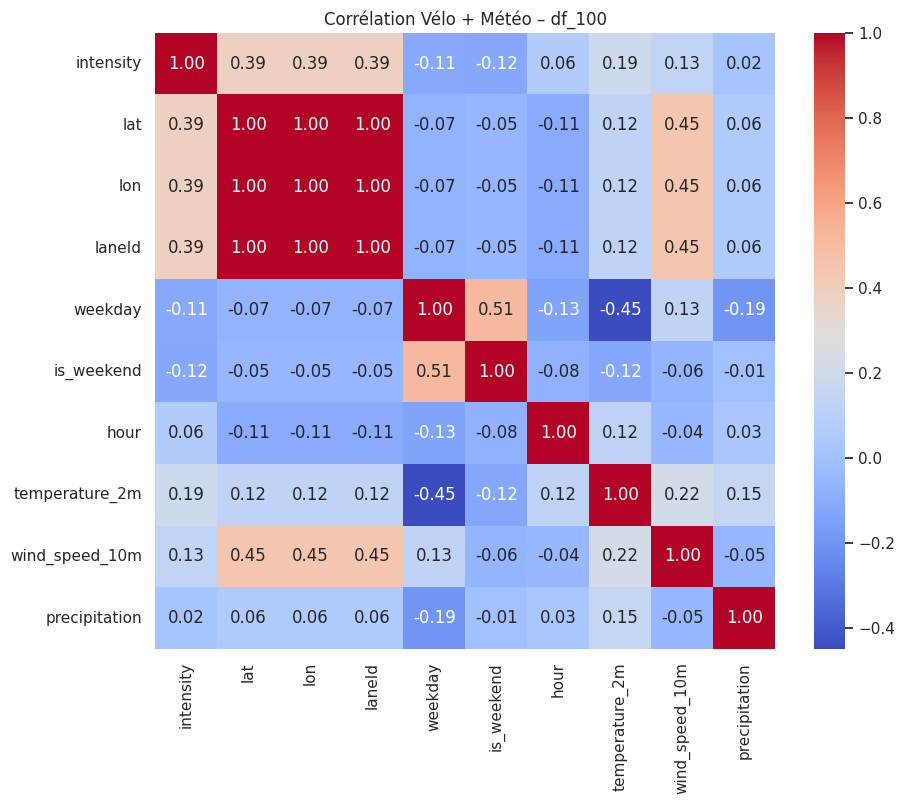

In [ ]:
# 2.3 Corrélation météo ↔ intensité
plot_correlation(df_all_meteo, "Corrélation Vélo + Météo – df_all")
plot_correlation(df_200_meteo, "Corrélation Vélo + Météo – df_200")
plot_correlation(df_162_meteo, "Corrélation Vélo + Météo – df_162")
plot_correlation(df_100_meteo, "Corrélation Vélo + Météo – df_100")

### analyse : Les corrélations sont faibles mais cohérentes avec l'intuition :

Température ↑ → Vélo ↑ (léger effet positif)

Pluie ↑ → Vélo ↓ (léger effet négatif)

Vent → pas d'effet clair

Les corrélations :

**Pluie a un effet négatif (-0.03) sur le vélo** 

**Température a un effet positif (+0.13 à +0.14)**

**Mais ces effets sont faibles en corrélation linéaire. Pour mieux les voir :

Essayer des visualisations non linéaires (boxplot par catégorie)

Tester des décalages temporels (pluie à l'heure t-1 vs vélo à l'heure t)

Utiliser des seuils pour voir les effets forts (jours de forte pluie)

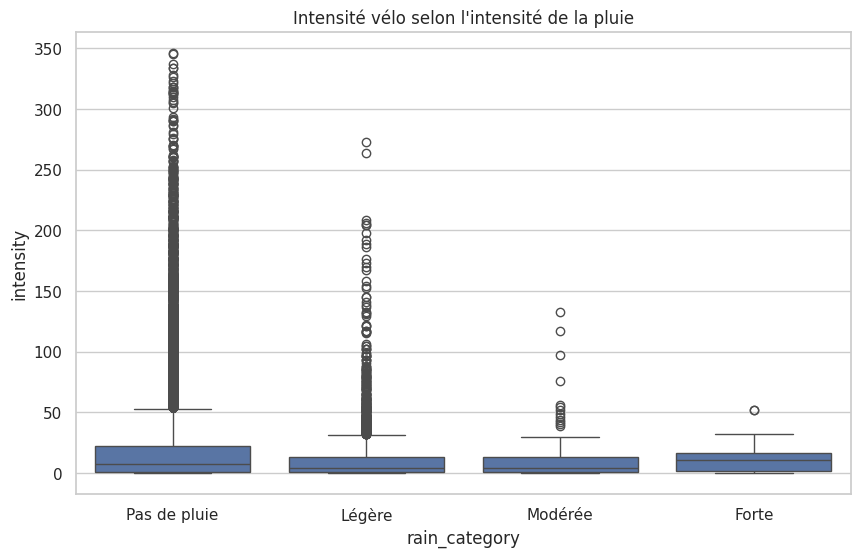

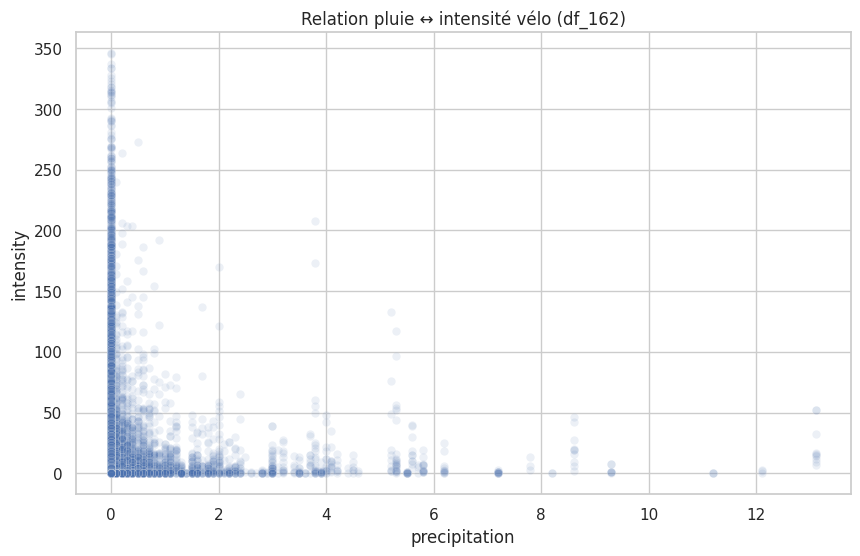

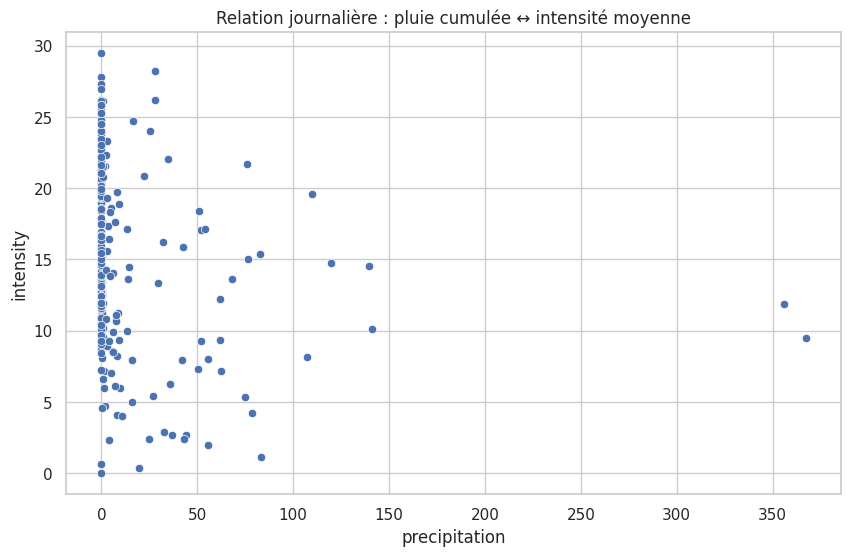

In [84]:
# 1. Créer des catégories de pluie
df_162_meteo['rain_category'] = pd.cut(df_162_meteo['precipitation'], 
                                    bins=[-1, 0.1, 5, 10, 50], 
                                    labels=['Pas de pluie', 'Légère', 'Modérée', 'Forte'])

# 2. Boxplot intensité par catégorie de pluie
plt.figure(figsize=(10,6))
sns.boxplot(x='rain_category', y='intensity', data=df_162_meteo)
plt.title("Intensité vélo selon l'intensité de la pluie")
plt.show()

# 3. Scatter plot avec régression
plt.figure(figsize=(10,6))
sns.scatterplot(x='precipitation', y='intensity', data=df_162_meteo, alpha=0.1)
plt.title("Relation pluie ↔ intensité vélo (df_162)")
plt.show()

# 4. Regrouper par jour avec somme de pluie et moyenne vélo
df_daily = df_162_meteo.groupby(df_162_meteo['datetime'].dt.date).agg({
    'intensity': 'mean',
    'precipitation': 'sum'
}).reset_index()

# Scatter plot journalier
plt.figure(figsize=(10,6))
sns.scatterplot(x='precipitation', y='intensity', data=df_daily)
plt.title("Relation journalière : pluie cumulée ↔ intensité moyenne")
plt.show()

##  3) Autocorrélation (ACF) + partielle (PACF): 
Voir si l’intensité dépend du passé, utile pour :

ARIMA

RandomForest

LSTM

Interprétation attendue :

Lag 1h très corrélé → important pour modèle

Lag 24h très corrélé → saisonnalité journalière

Décroissance lente → série très dépendante du passé

<Figure size 1200x400 with 0 Axes>

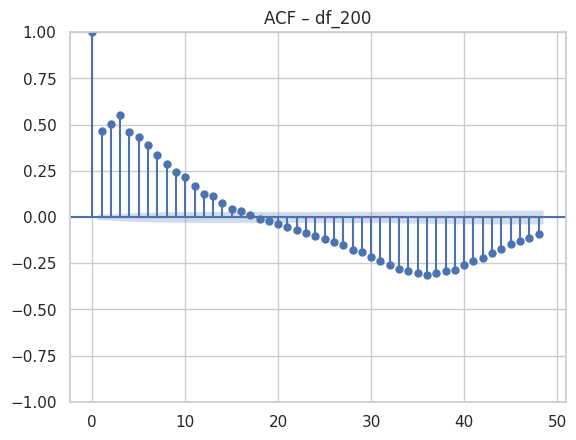

<Figure size 1200x400 with 0 Axes>

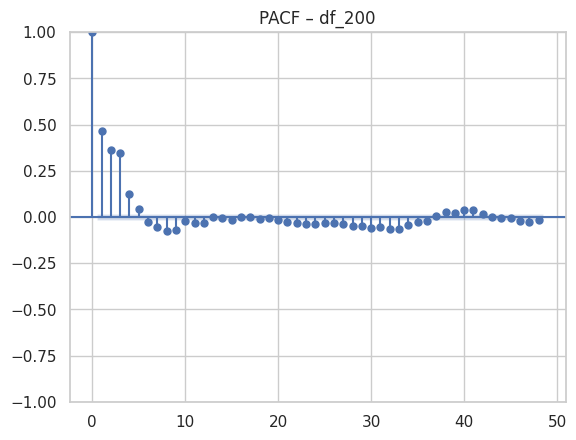

<Figure size 1200x400 with 0 Axes>

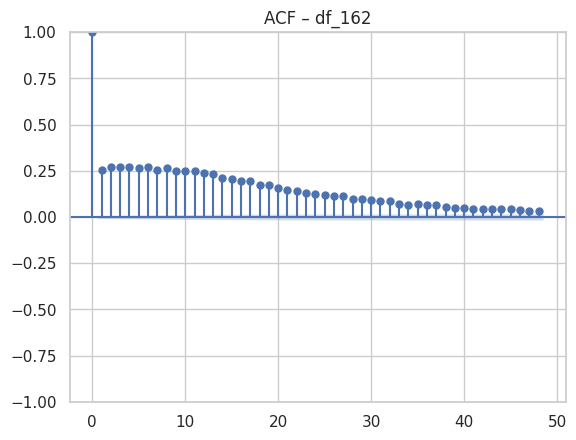

<Figure size 1200x400 with 0 Axes>

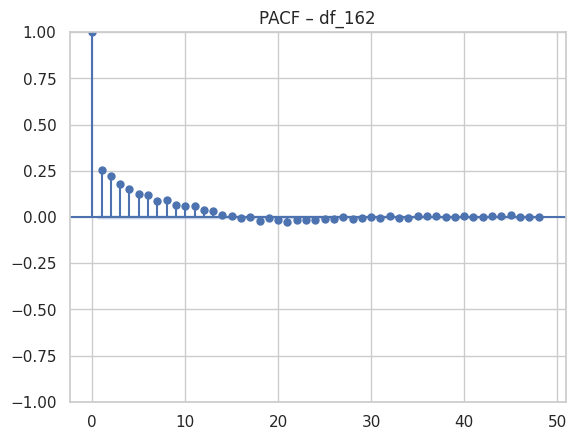

In [83]:
# ACF / PACF (statsmodels): from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_autocorr(df, title):
    df_sorted = df.sort_values("datetime")
    series = df_sorted["intensity"]

    plt.figure(figsize=(12,4))
    plot_acf(series, lags=48)
    plt.title(f"ACF – {title}")
    plt.show()

    plt.figure(figsize=(12,4))
    plot_pacf(series, lags=48)
    plt.title(f"PACF – {title}")
    plt.show()

plot_autocorr(df_200, "df_200")
plot_autocorr(df_162, "df_162")

